<a href="https://colab.research.google.com/github/ronka2/projetDS/blob/master/Projet_TANG_Boris_SZUCS_Aron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import files

from matplotlib import pyplot as plt
import scipy.stats as stats
import pylab
import pickle

In [ ]:
uploaded = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData (1).csv


In [ ]:
df = pd.read_csv("SeoulBikeData.csv",encoding="latin1")

In [ ]:
df.head(20)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
sum= df.groupby("Seasons")["Rented Bike Count"].sum()
sum

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

# Some vizualisations


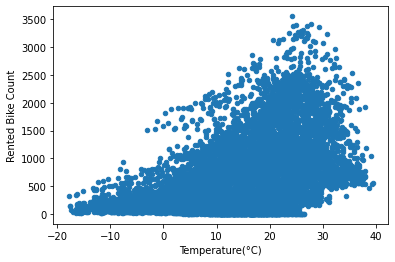

In [ ]:
df.plot.scatter(x="Temperature(°C)",y="Rented Bike Count")

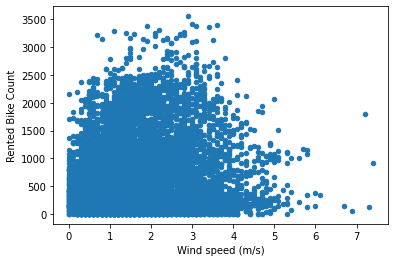

In [ ]:
df.plot.scatter(x="Wind speed (m/s)",y="Rented Bike Count")

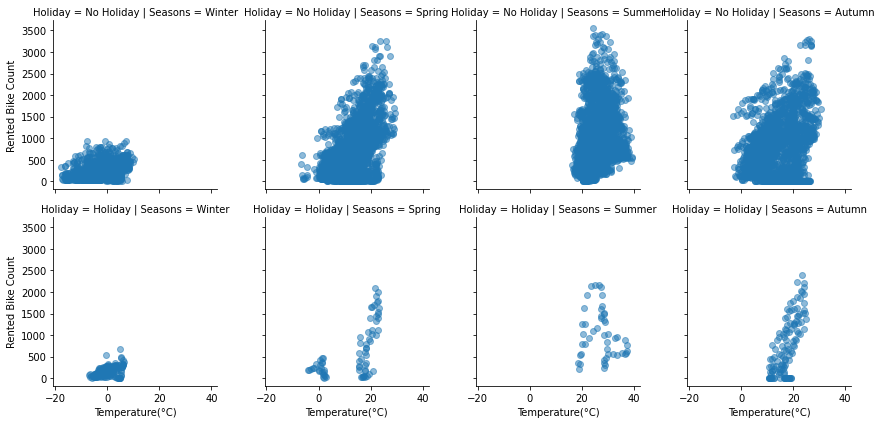

In [ ]:
grid = sns.FacetGrid(df, col = 'Seasons', row = 'Holiday')
grid.map(plt.scatter, 'Temperature(°C)', 'Rented Bike Count', alpha = 0.5)
grid.add_legend();

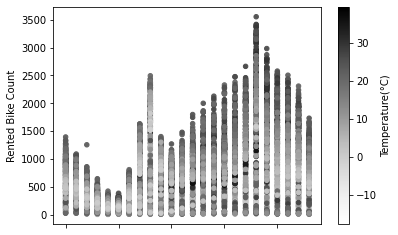

In [ ]:
filter_working_day=df['Functioning Day']=='Yes'
df_filtered_wd=df[filter_working_day]
df_filtered_wd.plot.scatter(x="Hour",y="Rented Bike Count",c="Temperature(°C)")

#DATA FITTING



In [ ]:
df_fit= df.drop(columns="Date")
df_fit.replace({"Winter": 0, "Spring": 1, "Summer": 2, "Autumn": 3},inplace=True)
df_fit.replace({"No Holiday":0,"Holiday":1},inplace=True)
df_fit.replace({"Yes":1,"No":0},inplace=True)
df_fit


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0,1


# TRAIN SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
x=df_fit.drop("Rented Bike Count",axis =1)
y=df_fit['Rented Bike Count']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)


Utilisation d'un standard scaler pour eliminer les valeurs négatives (non exploitables pour les fonctions d'erreur)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(x_train)
X_test  = scaler.transform(x_test)  # apply same transformation to test data

In [ ]:
X_train

array([[-0.78805713,  0.08193331,  1.40622988, ..., -0.46077616,
        -0.22957322,  0.1831426 ],
       [ 1.08478555,  0.53469548,  1.30793181, ...,  0.44078077,
        -0.22957322,  0.1831426 ],
       [-0.78805713,  0.4676196 ,  1.25878277, ..., -0.46077616,
        -0.22957322,  0.1831426 ],
       ...,
       [ 0.22039662,  0.99584213,  0.96388856, ...,  1.34233769,
        -0.22957322,  0.1831426 ],
       [-0.64399231, -0.63074787, -0.01909214, ..., -0.46077616,
        -0.22957322,  0.1831426 ],
       [ 0.65259109,  0.72753862, -1.10037091, ...,  1.34233769,
        -0.22957322, -5.46022622]])

In [ ]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

# MULTILINEAR REGRESSION 




In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
reg=model.fit(x_train,y_train)
print("score",model.score(x,y)," RMSLE",rmsle(y_test, model.predict(x_test)))


score 0.5444260664120095  RMSLE 1.6611915225186547


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


# GRID SEARCH


Standard parameters

In [ ]:
from sklearn import svm
from sklearn.model_selection import  cross_val_score
svr = svm.SVR(kernel='linear')
cross_val_score(svr, x_train, y_train, n_jobs=-1)

fonction pour tester les hyperparametres

In [ ]:
from sklearn.model_selection import GridSearchCV
def test_hyperparametres(hyperparametres):
    grid       = GridSearchCV(svm.SVR(), hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_
    

In [ ]:
parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
test_hyperparametres(parameters)

0.3141489140484092 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


(0.3141489140484092,
 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))

In [ ]:
parameters = {  'C'      : [1, 3, 5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
test_hyperparametres(parameters)

0.5826430451684999 SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


(0.5826430451684999,
 SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))

trouver des bons hyperparameters pour xgbregressor

In [ ]:
from xgboost import XGBRegressor
algo = XGBRegressor()


test hyperparametre pour différents algo

In [ ]:
def test_hyperparametres(algo, hyperparametres):
    grid       = GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_,grid.best_params_)    
    return grid.best_score_, grid.best_estimator_,grid.best_params_


In [ ]:
espace_de_Recherche = {
    "max_depth" : [1,5,10],
    "gamma" : [ 1.5, 2, 2.5,3]
}
test_hyperparametres(XGBRegressor(), espace_de_Recherche)


[19:38:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8700323666524881 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1.5,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1) {'gamma': 1.5, 'max_depth': 5}


(0.8700323666524881,
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1.5,
              importance_type='gain', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),
 {'gamma': 1.5, 'max_depth': 5})

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
max_depth=np.arange(1, 50)
min_samples_leaf=np.arange(1, 50)
decision_tree_param={'max_depth': max_depth,'min_samples_leaf':min_samples_leaf}
best_param=test_hyperparametres(decision_tree, decision_tree_param)[2]


0.81207656943365 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=12,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=14, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') {'max_depth': 12, 'min_samples_leaf': 14}


In [ ]:
best_param

{'max_depth': 12, 'min_samples_leaf': 14}

In [ ]:
#decision_tree_R=DecisionTreeRegressor(max_depth=10,min_samples_leaf=1)
decision_tree_R=DecisionTreeRegressor(max_depth=best_param['max_depth'],min_samples_leaf=best_param['min_samples_leaf'])
model = decision_tree_R.fit(x_train,y_train)
y_pred = model.predict(x_test)
rmsle(y_test, y_pred)

0.6931322109666241

In [ ]:
x_test

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6154,10,31.7,57,1.3,1875,22.1,1.25,0.0,0.0,2,0,1
1394,2,-7.8,51,1.9,1627,-16.1,0.00,0.0,0.0,0,0,1
4678,22,21.6,66,1.2,1438,14.9,0.00,0.0,0.0,2,0,1
3516,12,19.6,36,2.2,962,4.1,2.55,0.0,0.0,1,0,1
3789,21,19.6,64,1.5,1297,12.5,0.00,0.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,7,-15.1,45,0.9,2000,-24.4,0.00,0.0,0.0,0,0,1
8449,1,3.2,54,1.2,1968,-5.2,0.00,0.0,0.0,3,0,1
1353,9,-17.5,37,3.8,1941,-28.7,0.21,0.0,0.5,0,0,1
6254,14,31.0,31,1.8,1999,11.8,2.80,0.0,0.0,2,0,1


In [ ]:
y_pred

array([ 671.25      ,  121.5       , 1888.        , ...,  189.5       ,
        967.        ,  301.33333333])

In [ ]:
y_test

6154     615
1394      72
4678    1934
3516    1197
3789    1717
        ... 
1015     189
8449     443
1353     149
6254    1121
2125     335
Name: Rented Bike Count, Length: 2628, dtype: int64

In [ ]:
x_axis=np.linspace(0,len(x_test.index),len(x_test.index))

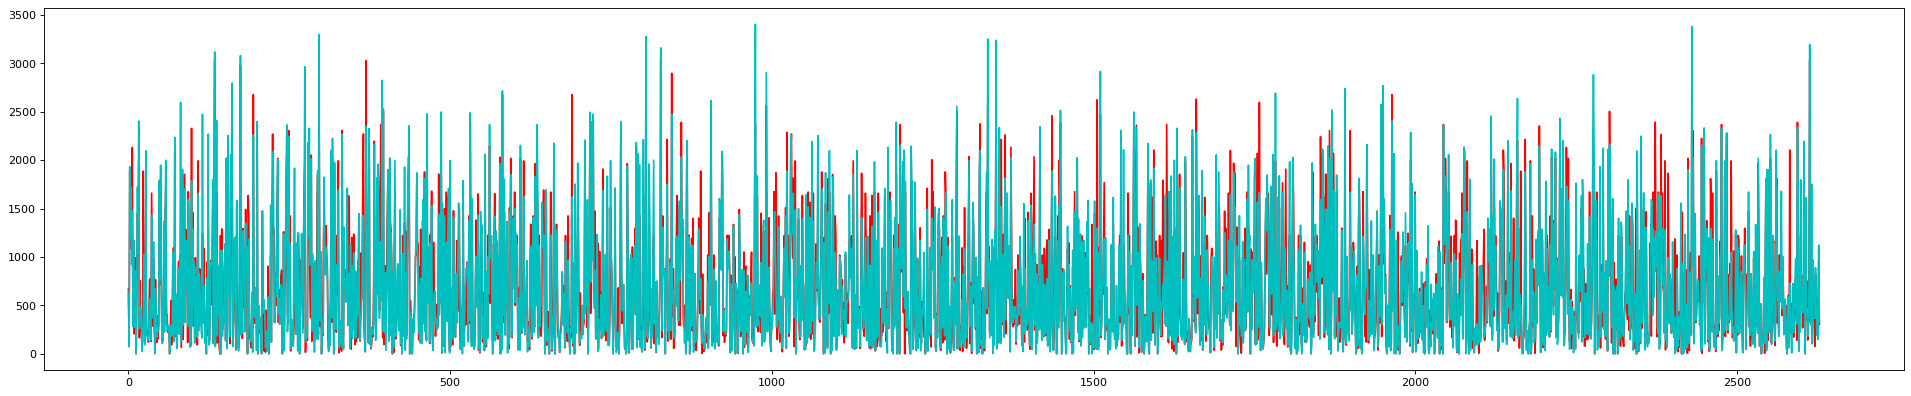

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x_axis,y_pred,'r',linestyle="-")
plt.plot(x_axis,y_test,'c',linestyle="-")
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state=0)
n_estimators =[int(x) for x in np.linspace(start = 25, stop = 150, num =25)]
max_depth = [int(x) for x in np.linspace(1, 15, num = 2)]
min_samples_leaf=np.arange(2,15,3)
random_forest_params = {'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf}
#random_forest.get_params()
best_param=test_hyperparametres(random_forest,random_forest_params)[2]

0.8650543822942799 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False) {'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 150}


In [ ]:
best_param

{'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 150}

In [ ]:
random_forest_R = RandomForestRegressor(n_estimators=best_param['n_estimators'],max_depth=best_param['max_depth'],min_samples_leaf=best_param['min_samples_leaf'])
model = random_forest_R.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(rmsle(y_test, y_pred))

0.7473897091018873

In [ ]:
y_test

6154     615
1394      72
4678    1934
3516    1197
3789    1717
        ... 
1015     189
8449     443
1353     149
6254    1121
2125     335
Name: Rented Bike Count, Length: 2628, dtype: int64

In [ ]:
y_pred

array([ 675.1105092 ,  106.94471429, 1833.83781902, ...,  171.80603439,
       1029.28000987,  342.78120667])

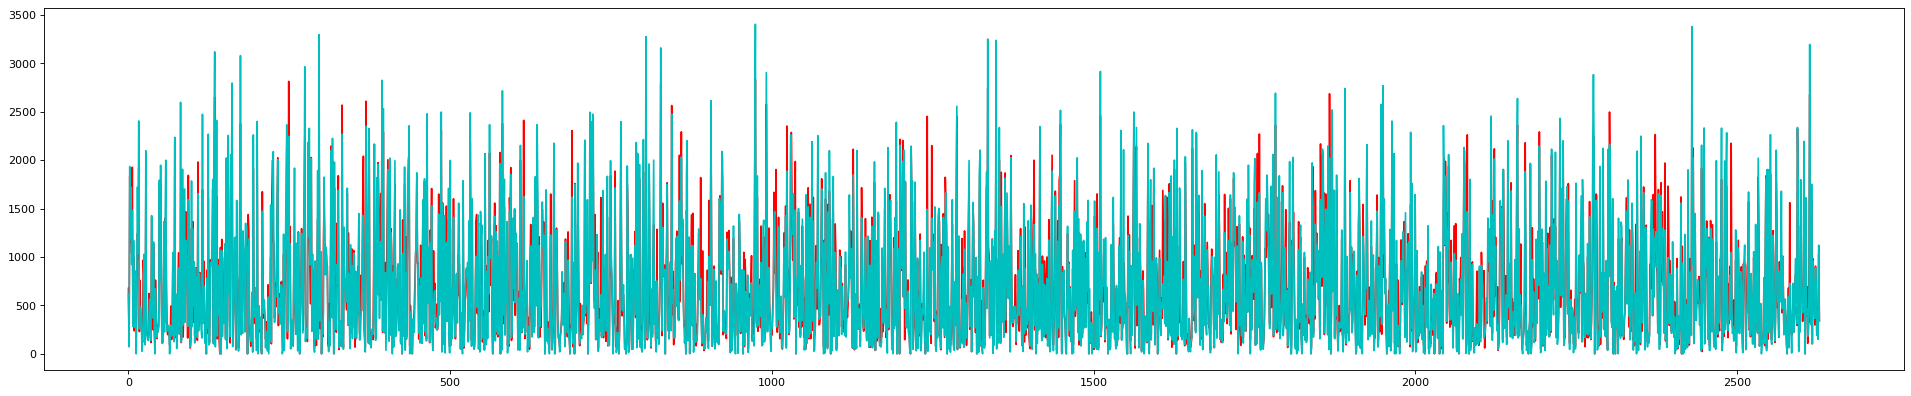

In [ ]:
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x_axis,y_pred,'r',linestyle="-")
plt.plot(x_axis,y_test,'c',linestyle="-")
plt.show()